In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/Segmentation_lesions_pulmonaires

/content/gdrive/MyDrive/Segmentation_lesions_pulmonaires


In [ ]:
import zipfile
with zipfile.ZipFile("/content/gdrive/MyDrive/Segmentation_lesions_pulmonaires/Segmentation.zip","r") as zip_ref:
    zip_ref.extractall("/content/gdrive/MyDrive/Segmentation_lesions_pulmonaires/Data")

## Partie 1 Base de données 



In [ ]:
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import cv2
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm


In [ ]:
dir_img = '/content/gdrive/MyDrive/Segmentation_lesions_pulmonaires/Data/frames/'
dir_mask = '/content/gdrive/MyDrive/Segmentation_lesions_pulmonaires/Data/masks/'

Tab_img = []
Tab_label = []

width, height = 224, 224

for i in tqdm(os.listdir(dir_img)) :
  img = cv2.imread(dir_img+i)
  label = cv2.imread(dir_mask+i)
  img = cv2.resize(img, (width, height))/255
  label = cv2.resize(label, (width, height))/255
  Tab_img.append(img)
  Tab_label.append(label)



  8%|▊         | 225/2729 [00:09<01:47, 23.26it/s]


KeyboardInterrupt: ignored

In [ ]:
Tab_img = np.array(Tab_img)
Tab_label = np.array(Tab_label)

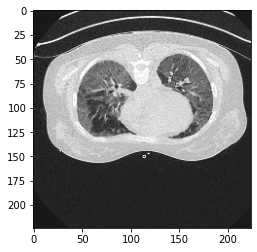

In [ ]:
plt.imshow( Tab_img [2] )
plt.show()

## Séparation des données 


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Tab_img, Tab_label, test_size=0.2, random_state=42)
## Validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

## Data Augmentation


In [ ]:
from keras.preprocessing import image
model_datagen = image.ImageDataGenerator(shear_range=0.5, rotation_range=50, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, fill_mode='reflect')

model_datagen.fit(X_train)

X_train_Aug = model_datagen.flow(X_train)
y_train_Aug = model_datagen.flow(y_train)

Train_Data = zip(X_train_Aug, y_train_Aug)

## Partie 2 :Transfer Learning



In [ ]:
!pip install segmentation-models

from segmentation_models import Unet

import segmentation_models as sm

sm.set_framework('tf.keras')

sm.framework()

model = Unet('resnet34', encoder_weights='imagenet', classes=1, input_shape=(224,224, 3), activation='sigmoid')

model.compile('Adam', loss="binary_crossentropy", metrics=["acc"])

results = model.fit_generator(Train_Data, validation_data=(X_val, y_val), validation_steps=500, steps_per_epoch=1000,epochs=10)
model.save_weights('Unet_weights.h5')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
85532672/85521592 [==============================] - 2s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


Epoch 1/10
 265/1000 [======>.......................] - ETA: 5:31:04 - loss: 0.1493 - acc: 0.9593